In [1]:
from joblib import load
import pandas as pd
import code.operators as ops

#  Case Study 1 - Loan Default Prediction

In [2]:
data = pd.read_csv('x_train.csv', index_col=['Loan_ID'])
svc_bias = load('svc_loan_bias.joblib')
lr_bias = load('lr_loan_bias.joblib')
lr = load('lr_loan.joblib')
svc = load('svc_loan.joblib')

In [3]:
X_new = ops.data_generator_fd(data)

In [4]:
X_new.describe()

,Gender,Education,Self_Employed,Credit_History,Property_Area_Semiurban,Property_Area_Urban,ln_monthly_return,ln_total_income,ln_LoanAmount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.501000,0.534000,0.507000,0.849151,0.479000,0.495000,-0.422051,-0.896635,-0.140051
std,0.500249,0.499092,0.500201,0.364508,0.499809,0.500225,23.084265,21.625664,22.687147
min,0.000000,0.000000,0.000000,-0.386603,0.000000,0.000000,-71.713201,-70.220720,-71.657594
25%,0.000000,0.000000,0.000000,0.616325,0.000000,0.000000,-15.729590,-15.939658,-15.422592
50%,1.000000,1.000000,1.000000,0.833829,0.000000,0.000000,-1.166282,-0.879196,0.646336
75%,1.000000,1.000000,1.000000,1.097663,1.000000,1.000000,14.300876,13.499443,15.444715
max,1.000000,1.000000,1.000000,1.988436,1.000000,1.000000,68.468200,71.018384,61.212319


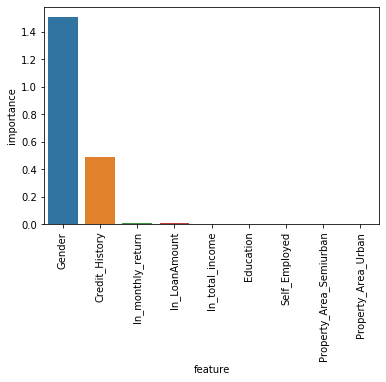

In [5]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr_bias, X_new))

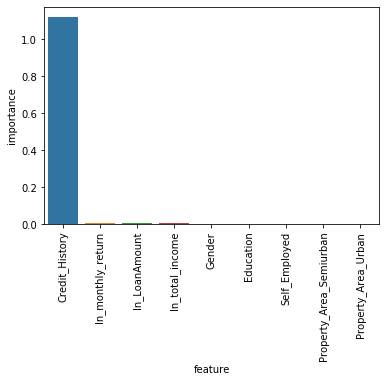

In [6]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr, X_new))

In [7]:
pred_n_bias = ops.create_eval(svc_bias, X_new)
pred_n = ops.create_eval(svc, X_new)

In [8]:
ops.calc_disparity_index(pred_n_bias, 'Pred', 'Gender',0)

1-min(DI, 1/DI): 0.888
There is a potential bias


In [9]:
ops.calc_stat_parity(pred_n_bias, 'Pred', 'Gender',0)

-0.666
There is a potential bias


In [10]:
ops.calc_mean_diff(pred_n_bias, 'Pred', 'Gender',0)

-0.666
There is a potential bias


In [11]:
ops.equal_opportunity(X_new, pred_n_bias, 'Pred', 'Gender', 0)

-0.6810772501771793
There is a potential bias


In [13]:
ops.coeff_variation(X_new, pred_n_bias, 'Pred', 'Gender', 0)

0.5048389895599675
There is a potential bias


In [15]:
bina = ops.create_binary(pred_n_bias, 'Pred', 'Gender', 0)

In [16]:
ops.MetricTextExplainer_(bina).explain()

Consistency (Zemel, et al. 2013): [0.665]
Number of positive-outcome instances: 418.0
Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): -0.6663306653226613
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.6663306653226613
Number of instances: 1000.0
Number of negative-outcome instances: 582.0
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.11214983157804972


# Case Study 2 - Credit Card Acceptance

In [17]:
data = pd.read_csv('x_train_cc.csv', index_col=0)
svc = load('svc_cc.joblib')
lr = load('lr_cc.joblib')

In [18]:
X_new = ops.data_generator_fd(data)
X_new.head(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,31.830541,6.550703,2,1,1,2,-1.915360,1,1,50,1,2,19,6216
1,0,32.627403,13.522734,0,1,6,4,0.054652,0,0,63,0,1,79,11809
2,0,29.446780,4.646514,2,1,12,2,2.161283,1,0,10,0,1,123,19645
3,0,25.477405,-0.581388,2,2,9,7,4.789087,1,0,33,0,2,100,1998
4,1,37.086113,-4.925976,2,1,13,8,-0.081900,1,0,38,0,2,105,18192
5,0,36.247936,0.389687,0,2,0,6,1.226111,0,1,34,1,1,91,46097
6,1,28.818390,6.396250,1,1,9,1,-3.369011,0,1,7,0,2,160,35583
7,0,18.407360,9.131053,0,1,2,4,-0.207497,1,0,3,1,0,96,26871
8,0,30.591218,4.943105,2,0,11,3,1.304216,0,0,19,1,1,22,14160
9,1,15.961271,5.990760,2,1,13,8,3.030180,0,0,7,0,2,48,39792


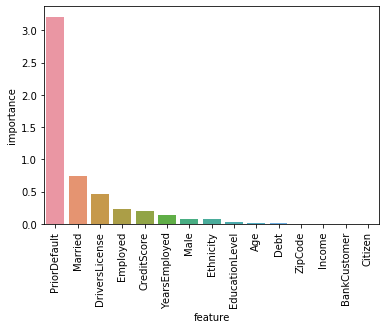

In [19]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr, X_new))

In [20]:
pred_n = ops.create_eval(lr, X_new)
pred_n.head(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Pred
0,1,31.830541,6.550703,2,1,1,2,-1.915360,1,1,50,1,2,19,6216,0
1,0,32.627403,13.522734,0,1,6,4,0.054652,0,0,63,0,1,79,11809,0
2,0,29.446780,4.646514,2,1,12,2,2.161283,1,0,10,0,1,123,19645,0
3,0,25.477405,-0.581388,2,2,9,7,4.789087,1,0,33,0,2,100,1998,0
4,1,37.086113,-4.925976,2,1,13,8,-0.081900,1,0,38,0,2,105,18192,0
5,0,36.247936,0.389687,0,2,0,6,1.226111,0,1,34,1,1,91,46097,0
6,1,28.818390,6.396250,1,1,9,1,-3.369011,0,1,7,0,2,160,35583,0
7,0,18.407360,9.131053,0,1,2,4,-0.207497,1,0,3,1,0,96,26871,0
8,0,30.591218,4.943105,2,0,11,3,1.304216,0,0,19,1,1,22,14160,0
9,1,15.961271,5.990760,2,1,13,8,3.030180,0,0,7,0,2,48,39792,0


In [28]:
ops.calc_disparity_index(pred_n, 'Pred', 'Ethnicity', 4)

1-min(DI, 1/DI): 0.622
There is a potential bias


In [29]:
ops.calc_stat_parity(pred_n, 'Pred', 'Ethnicity',4)

0.011
The algorithm can be considered to be not biased


In [30]:
ops.calc_mean_diff(pred_n, 'Pred', 'Ethnicity',4)

0.011
The algorithm can be considered to be not biased


In [31]:
ops.equal_opportunity(X_new, pred_n, 'Pred', 'Ethnicity', 4)

0.011243386243386243
The algorithm can be considered to be not biased


In [32]:
ops.coeff_variation(X_new, pred_n, 'Pred', 'Ethnicity', 4)

0.0712360551367611
The algorithm can be considered to be not biased


In [33]:
bina = ops.create_binary(pred_n, 'Pred', 'Ethnicity', 4)
ops.MetricTextExplainer_(bina).explain()

Consistency (Zemel, et al. 2013): [0.9906]
Number of positive-outcome instances: 8.0
Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): 0.011100386100386099
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): 0.011100386100386099
Number of instances: 1000.0
Number of negative-outcome instances: 992.0
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 2.6428571428571423
